In [1]:
#Import all the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
import urllib
from config import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"



In [2]:
#latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List - lat_lngs and cities
lat_lngs = []
cities = []

# random lat and lng 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#  nearest city - each lat, lng 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:

#Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=albany
Processing Record 2 of Set 1 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=fortuna
Processing Record 3 of Set 1 | olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=olafsvik
City not found. Skipping...
Processing Record 4 of Set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=mahebourg
Processing Record 5 of Set 1 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=luderitz
Processing Record 6 of Set 1 | velikiy ustyug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=velikiy

Processing Record 2 of Set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=ushuaia
Processing Record 3 of Set 2 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=nanortalik
Processing Record 4 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=jamestown
Processing Record 5 of Set 2 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=thompson
Processing Record 6 of Set 2 | matamoros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=matamoros
Processing Record 7 of Set 2 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lompoc
Processing Record 8 of Set 2 | clyde river
http://api.openweathermap.org/data/2.5/weat

Processing Record 5 of Set 3 | ust-kan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=ust-kan
Processing Record 6 of Set 3 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=sibolga
Processing Record 7 of Set 3 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=cape%20town
Processing Record 8 of Set 3 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=georgetown
Processing Record 9 of Set 3 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=henties%20bay
Processing Record 10 of Set 3 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=klaksvik
Processing Record 11 of Set 3 | keetmanshoop
http://api.openweathermap.org/

Processing Record 7 of Set 4 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=margate
Processing Record 8 of Set 4 | nsanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=nsanje
Processing Record 9 of Set 4 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=aklavik
Processing Record 10 of Set 4 | jardim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=jardim
Processing Record 11 of Set 4 | whitianga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=whitianga
Processing Record 12 of Set 4 | gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=gushikawa
Processing Record 13 of Set 4 | dingle
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 10 of Set 5 | jiazi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=jiazi
Processing Record 11 of Set 5 | lufkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lufkin
Processing Record 12 of Set 5 | kiruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=kiruna
Processing Record 13 of Set 5 | tirano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=tirano
Processing Record 14 of Set 5 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=bambous%20virieux
Processing Record 15 of Set 5 | madras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=madras
Processing Record 16 of Set 5 | santa cruz
http://api.openweathermap.org/data/2.5/weathe

Processing Record 13 of Set 6 | filingue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=filingue
Processing Record 14 of Set 6 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=san%20policarpo
Processing Record 15 of Set 6 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lima
Processing Record 16 of Set 6 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hami
Processing Record 17 of Set 6 | turayf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=turayf
Processing Record 18 of Set 6 | nayudupeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=nayudupeta
Processing Record 19 of Set 6 | airai
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 15 of Set 7 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=mount%20isa
Processing Record 16 of Set 7 | san lorenzo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=san%20lorenzo
Processing Record 17 of Set 7 | kinablangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=kinablangan
Processing Record 18 of Set 7 | elk city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=elk%20city
Processing Record 19 of Set 7 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hualmay
Processing Record 20 of Set 7 | hamada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hamada
Processing Record 21 of Set 7 | vestmanna
http://api.openweathermap.

Processing Record 17 of Set 8 | koslan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=koslan
Processing Record 18 of Set 8 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hamilton
Processing Record 19 of Set 8 | vanavara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=vanavara
Processing Record 20 of Set 8 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=dunedin
Processing Record 21 of Set 8 | scottsburgh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=scottsburgh
City not found. Skipping...
Processing Record 22 of Set 8 | krasnyy chikoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=krasnyy%20chikoy
Processing Record 23 of Set 8 | sretensk

Processing Record 20 of Set 9 | ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=ilo
Processing Record 21 of Set 9 | waharoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=waharoa
Processing Record 22 of Set 9 | caluquembe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=caluquembe
Processing Record 23 of Set 9 | kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=kidal
Processing Record 24 of Set 9 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=verkhoyansk
Processing Record 25 of Set 9 | lancaster
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lancaster
Processing Record 26 of Set 9 | cidreira
http://api.openweathermap.org/data/2.5/weather?

Processing Record 23 of Set 10 | newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=newport
Processing Record 24 of Set 10 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hervey%20bay
Processing Record 25 of Set 10 | sorvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=sorvag
City not found. Skipping...
Processing Record 26 of Set 10 | wajir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=wajir
Processing Record 27 of Set 10 | balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=balkhash
Processing Record 28 of Set 10 | uyuni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=uyuni
Processing Record 29 of Set 10 | hobyo
http://api.openweathe

Processing Record 25 of Set 11 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=alofi
Processing Record 26 of Set 11 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hihifo
City not found. Skipping...
Processing Record 27 of Set 11 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=kununurra
Processing Record 28 of Set 11 | rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=rongcheng
Processing Record 29 of Set 11 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=nyurba
Processing Record 30 of Set 11 | lago da pedra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lago%20da%20pedra
City not found. Skipping...
Processing Recor

Processing Record 28 of Set 12 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=quatre%20cocos
Processing Record 29 of Set 12 | yomitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=yomitan
City not found. Skipping...
Processing Record 30 of Set 12 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=sao%20filipe
Processing Record 31 of Set 12 | sarandi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=sarandi
Processing Record 32 of Set 12 | kingisepp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=kingisepp
Processing Record 33 of Set 12 | lumsden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lumsden
Processing Record 34 of Set 12 | coi

Processing Record 31 of Set 13 | hays
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=hays
Processing Record 32 of Set 13 | lekoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=lekoni
Processing Record 33 of Set 13 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd4703ced6a2861eeb59bef6bfe78d33&q=altay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")


city_data_pd.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [5]:
# display Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75,US,1525366440,50,42.65,-73.75,80.60,4.70
1,fortuna,20,ES,1525366800,33,38.18,-1.13,73.40,12.75
2,mahebourg,40,MU,1525366800,65,-20.41,57.70,77.00,11.41
3,luderitz,0,NA,1525368197,90,-26.65,15.16,61.91,7.40
4,velikiy ustyug,88,RU,1525368198,92,60.76,46.30,38.06,13.44


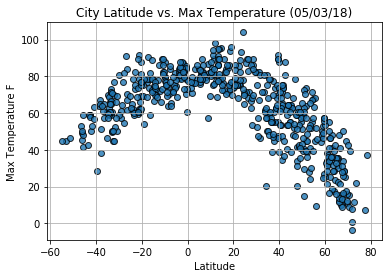

In [6]:
#Scatter #1
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature F")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('City Lat vs Max Temp.png', dpi = 600)
plt.show()

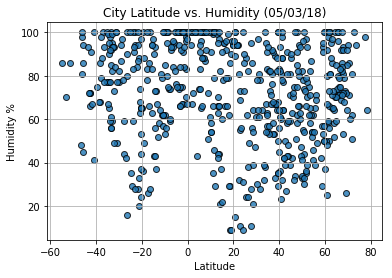

In [7]:
#Scatter #2
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('City Lat vs Hum.png', dpi = 600)
plt.show()

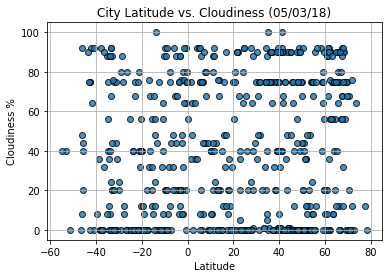

In [8]:
# Scatter #3
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('City Lat vs Cloud.png', dpi = 600)
plt.show()

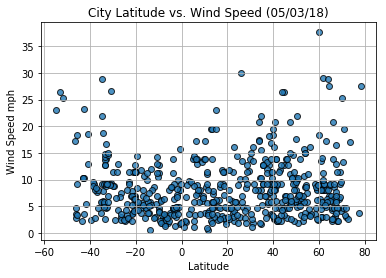

In [9]:
#scatter#4
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('City Lat vs Wind Speed.png', dpi = 600)
plt.show()